In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax

In [3]:
df = pd.read_csv("../Data/project_data.csv")

# Dropping redundant features
df = df.iloc[: , 1:]

# Exploratory Data Analysis
## Basic information about data

In [4]:
df.head()

,id,result,age,gender,race,marital_status,family_PIR,education_level_adults,language,sleep_hours,...,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD110,WHD120,WHD140,WHQ150
0,31139,0,18,2,2,5.0,4.91,NaN,1.0,6.0,...,62.0,160.0,3.0,3.0,190.0,NaN,NaN,NaN,190.0,17.0
1,31143,0,19,1,3,5.0,5.00,NaN,1.0,7.0,...,73.0,160.0,3.0,3.0,150.0,2.0,NaN,NaN,160.0,19.0
2,31150,0,79,1,3,3.0,1.22,3.0,1.0,8.0,...,69.0,190.0,3.0,3.0,190.0,2.0,190.0,170.0,227.0,38.0
3,31151,0,59,2,4,1.0,3.03,3.0,1.0,2.0,...,67.0,180.0,1.0,2.0,250.0,2.0,365.0,145.0,365.0,57.0
4,31152,0,27,2,1,1.0,1.76,3.0,1.0,8.0,...,59.0,214.0,1.0,2.0,214.0,1.0,NaN,195.0,214.0,26.0


In [5]:
df.shape

(26473, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26473 entries, 0 to 26472
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        26473 non-null  int64  
 1   result                    26473 non-null  int64  
 2   age                       26473 non-null  int64  
 3   gender                    26473 non-null  int64  
 4   race                      26473 non-null  int64  
 5   marital_status            25136 non-null  float64
 6   family_PIR                24209 non-null  float64
 7   education_level_adults    24791 non-null  float64
 8   language                  25899 non-null  float64
 9   sleep_hours               26371 non-null  float64
 10  trouble_sleeping_history  26473 non-null  int64  
 11  drinks_per_occasion       17426 non-null  float64
 12  SMQ020                    25477 non-null  float64
 13  SMD030                    11662 non-null  float64
 14  SMQ040

In [7]:
df['result'] = df.result.astype(object)
df['gender'] = df.gender.astype(object)
df['race'] = df.race.astype(object)
df['marital_status'] = df.marital_status.astype(object)
df['education_level_adults'] = df.education_level_adults.astype(object)

df['language'] = df.language.astype(object)
df['trouble_sleeping_history'] = df.trouble_sleeping_history.astype(object)
df['SMQ020'] = df.SMQ020.astype(object)
df['SMQ040'] = df.SMQ040.astype(object)
df['SMQ670'] = df.SMQ670.astype(object)
df['WHQ030'] = df.WHQ030.astype(object)


df['WHQ040'] = df.WHQ040.astype(object)
df['WHQ070'] = df.WHQ070.astype(object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26473 entries, 0 to 26472
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        26473 non-null  int64  
 1   result                    26473 non-null  object 
 2   age                       26473 non-null  int64  
 3   gender                    26473 non-null  object 
 4   race                      26473 non-null  object 
 5   marital_status            25136 non-null  object 
 6   family_PIR                24209 non-null  float64
 7   education_level_adults    24791 non-null  object 
 8   language                  25899 non-null  object 
 9   sleep_hours               26371 non-null  float64
 10  trouble_sleeping_history  26473 non-null  object 
 11  drinks_per_occasion       17426 non-null  float64
 12  SMQ020                    25477 non-null  object 
 13  SMD030                    11662 non-null  float64
 14  SMQ040

In [9]:
df.isnull().sum()

id                              0
result                          0
age                             0
gender                          0
race                            0
marital_status               1337
family_PIR                   2264
education_level_adults       1682
language                      574
sleep_hours                   102
trouble_sleeping_history        0
drinks_per_occasion          9047
SMQ020                        996
SMD030                      14811
SMQ040                      14773
SMD641                      20351
SMD650                      20557
SMD630                      25897
SMQ670                      23435
WHD010                        507
WHD020                        441
WHQ030                         57
WHQ040                         30
WHD050                        496
WHQ070                       3428
WHD110                       9339
WHD120                       5845
WHD140                        417
WHQ150                        515
dtype: int64

In [10]:
df.describe()

,id,age,family_PIR,sleep_hours,drinks_per_occasion,SMD030,SMD641,SMD650,SMD630,WHD010,WHD020,WHD050,WHD110,WHD120,WHD140,WHQ150
count,26473.000000,26473.000000,24209.000000,26371.000000,17426.000000,11662.000000,6122.000000,5916.000000,576.000000,25966.000000,26032.000000,25977.000000,17134.000000,20628.000000,26056.000000,25958.000000
mean,74082.726476,46.990179,2.402194,7.050301,2.867899,17.410050,24.874224,12.029243,21.935764,66.297427,179.812846,179.895292,174.142991,153.538734,197.254874,39.600200
std,27435.912883,18.765959,1.614494,1.620545,2.817143,6.425252,9.538691,10.428859,15.437539,4.131303,48.201363,50.439976,46.994284,40.216912,55.766381,17.203086
min,31139.000000,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,41.000000,70.000000,60.000000,70.000000,50.000000,73.000000,7.000000
25%,51042.000000,30.000000,1.030000,6.000000,1.000000,15.000000,25.000000,4.000000,14.000000,63.000000,145.000000,145.000000,140.000000,125.000000,160.000000,25.000000
50%,70401.000000,46.000000,1.950000,7.000000,2.000000,17.000000,30.000000,10.000000,16.000000,66.000000,173.000000,172.000000,165.000000,145.000000,187.000000,37.000000
75%,90581.000000,62.000000,3.820000,8.000000,3.000000,19.000000,30.000000,20.000000,18.000000,69.000000,205.000000,206.000000,198.000000,175.000000,226.000000,52.000000
max,124822.000000,85.000000,5.000000,14.500000,83.000000,76.000000,30.000000,95.000000,55.000000,83.000000,600.000000,618.000000,700.000000,530.000000,700.000000,85.000000


In [11]:
df.duplicated().sum()

0

In [12]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=0, stratify=df["result"])

In [13]:
train_set["result"].value_counts() / len(train_set)

0    0.854514
1    0.145486
Name: result, dtype: float64

In [14]:
test_set["result"].value_counts() / len(test_set)

0    0.854571
1    0.145429
Name: result, dtype: float64

## Summary Table
### Categorical Summary

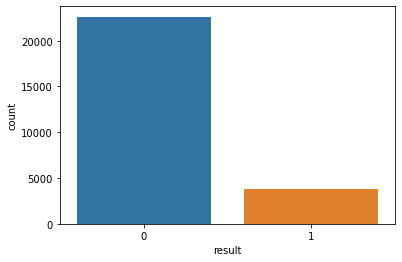

In [117]:
sns_plot = sns.countplot(x = 'result',
              data = df,
              order = df['result'].value_counts().index)

plt.savefig('../Output/imbalanced.png')
plt.show()

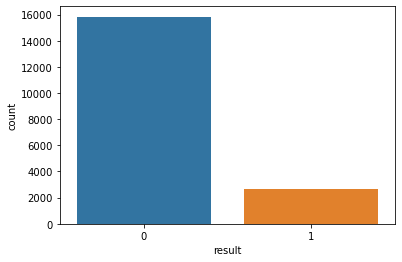

In [103]:
sns_plot = sns.countplot(x = 'result',
              data = train_set,
              order = train_set['result'].value_counts().index)
plt.show()

### Numerical Summary

/Users/viviandong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


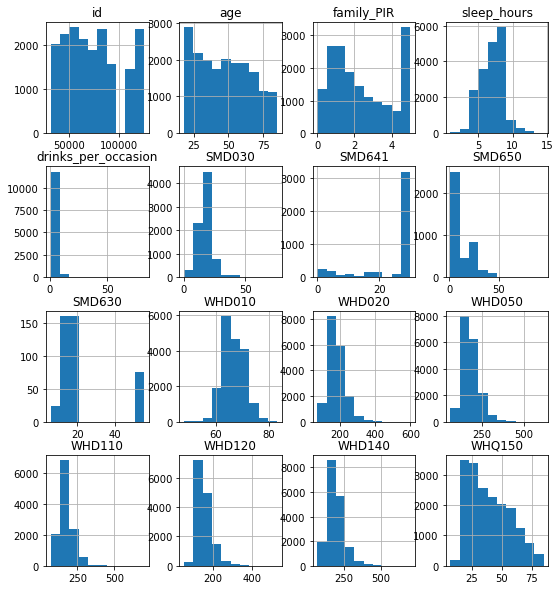

In [106]:
fig = plt.figure(figsize = (9,10))
ax = fig.gca()
train_set.hist(ax = ax)
plt.savefig('../Output/numhist.png')

## Correlation

In [107]:
train_set.corr()

,id,age,family_PIR,sleep_hours,drinks_per_occasion,SMD030,SMD641,SMD650,SMD630,WHD010,WHD020,WHD050,WHD110,WHD120,WHD140,WHQ150
id,1.000000,0.050917,0.005749,0.209972,-0.062615,0.053358,0.051977,-0.097205,-0.127914,-0.019532,0.054220,0.061699,0.074850,0.052893,0.078042,0.025544
age,0.050917,1.000000,0.072895,0.004028,-0.215194,0.133227,0.263820,0.170754,-0.083113,-0.089282,0.028492,0.078115,0.006241,-0.213156,0.075793,0.811579
family_PIR,0.005749,0.072895,1.000000,0.001289,-0.168571,-0.005957,-0.069115,-0.041944,-0.040269,0.102013,0.014736,0.026542,0.021563,0.027950,-0.009094,0.081557
sleep_hours,0.209972,0.004028,0.001289,1.000000,-0.046806,0.022719,-0.052444,-0.085332,0.009141,-0.053177,-0.062005,-0.064625,-0.020626,-0.048135,-0.067399,-0.005099
drinks_per_occasion,-0.062615,-0.215194,-0.168571,-0.046806,1.000000,-0.101907,-0.011896,0.047587,0.008710,0.136459,0.085556,0.069173,0.057712,0.138618,0.078666,-0.184278
SMD030,0.053358,0.133227,-0.005957,0.022719,-0.101907,1.000000,0.009241,-0.118056,NaN,-0.076574,-0.017381,-0.012194,-0.040266,-0.060113,-0.025137,0.116551
SMD641,0.051977,0.263820,-0.069115,-0.052444,-0.011896,0.009241,1.000000,0.381241,-0.220801,0.015768,0.005048,0.022601,-0.020596,-0.034289,0.056239,0.199599
SMD650,-0.097205,0.170754,-0.041944,-0.085332,0.047587,-0.118056,0.381241,1.000000,-0.304524,0.091104,0.037240,0.051446,0.073961,0.035000,0.079065,0.125489
SMD630,-0.127914,-0.083113,-0.040269,0.009141,0.008710,NaN,-0.220801,-0.304524,1.000000,-0.039417,0.023950,0.038555,NaN,NaN,0.047028,-0.007546
WHD010,-0.019532,-0.089282,0.102013,-0.053177,0.136459,-0.076574,0.015768,0.091104,-0.039417,1.000000,0.436564,0.425642,0.464077,0.548652,0.413244,-0.091323


In [15]:
corr = train_set.corr() # data is the pandas dataframe
c1 = corr.abs().unstack()

c1.sort_values(ascending=True, inplace=True)
columns_above_80 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.8 and col1 != col2]

columns_above_80

[('WHD110', 'WHD050'),
 ('WHD050', 'WHD110'),
 ('age', 'WHQ150'),
 ('WHQ150', 'age'),
 ('WHD110', 'WHD140'),
 ('WHD140', 'WHD110'),
 ('WHD140', 'WHD020'),
 ('WHD020', 'WHD140'),
 ('WHD050', 'WHD140'),
 ('WHD140', 'WHD050'),
 ('WHD020', 'WHD050'),
 ('WHD050', 'WHD020')]

In [18]:
for col1, col2 in c1.index:
    if c1[col1,col2] < 0.006 and col1 != col2:
        print(str(col1) + " " + str(col2) + ": " + str(c1[col1,col2]))

sleep_hours family_PIR: 0.0012891850869492325
family_PIR sleep_hours: 0.0012891850869492325
sleep_hours age: 0.004027773725678979
age sleep_hours: 0.004027773725678979
SMD641 WHD020: 0.005048447288902778
WHD020 SMD641: 0.005048447288902778
WHQ150 sleep_hours: 0.005099235585881514
sleep_hours WHQ150: 0.005099235585881514
id family_PIR: 0.00574886217803456
family_PIR id: 0.00574886217803456
SMD030 family_PIR: 0.005956968199182395
family_PIR SMD030: 0.005956968199182395


In [109]:
for col1, col2 in c1.index:
    if c1[col1,col2] > 0.8 and col1 != col2:
        print(str(col1) + " " + str(col2) + ": " + str(c1[col1,col2]))

WHD110 WHD050: 0.8038023639694372
WHD050 WHD110: 0.8038023639694372
age WHQ150: 0.8115785666179227
WHQ150 age: 0.8115785666179227
WHD110 WHD140: 0.8613678875063874
WHD140 WHD110: 0.8613678875063874
WHD140 WHD020: 0.9073772093574245
WHD020 WHD140: 0.9073772093574245
WHD050 WHD140: 0.9113083247689808
WHD140 WHD050: 0.9113083247689808
WHD020 WHD050: 0.9313189966406427
WHD050 WHD020: 0.9313189966406427


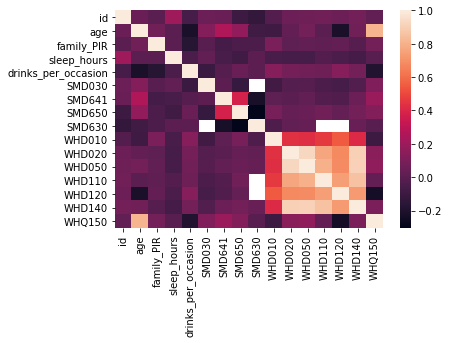

In [111]:
sns.heatmap(train_set.corr())
plt.savefig('../Output/cor.png')
plt.show()

## Pairs plot

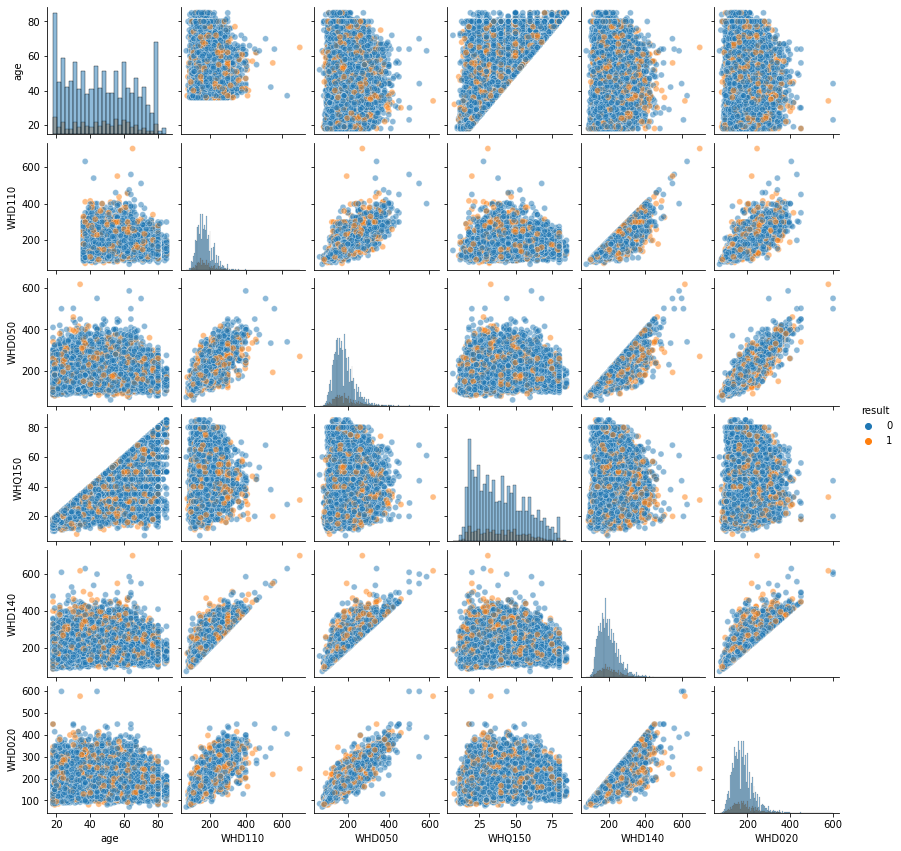

In [115]:
attributes = ["age","WHD110","WHD050","WHQ150","WHD140","WHD020"]

sns.pairplot(data=train_set, vars=attributes,
hue="result", plot_kws={'alpha': 0.5}, height=2, diag_kind='hist');

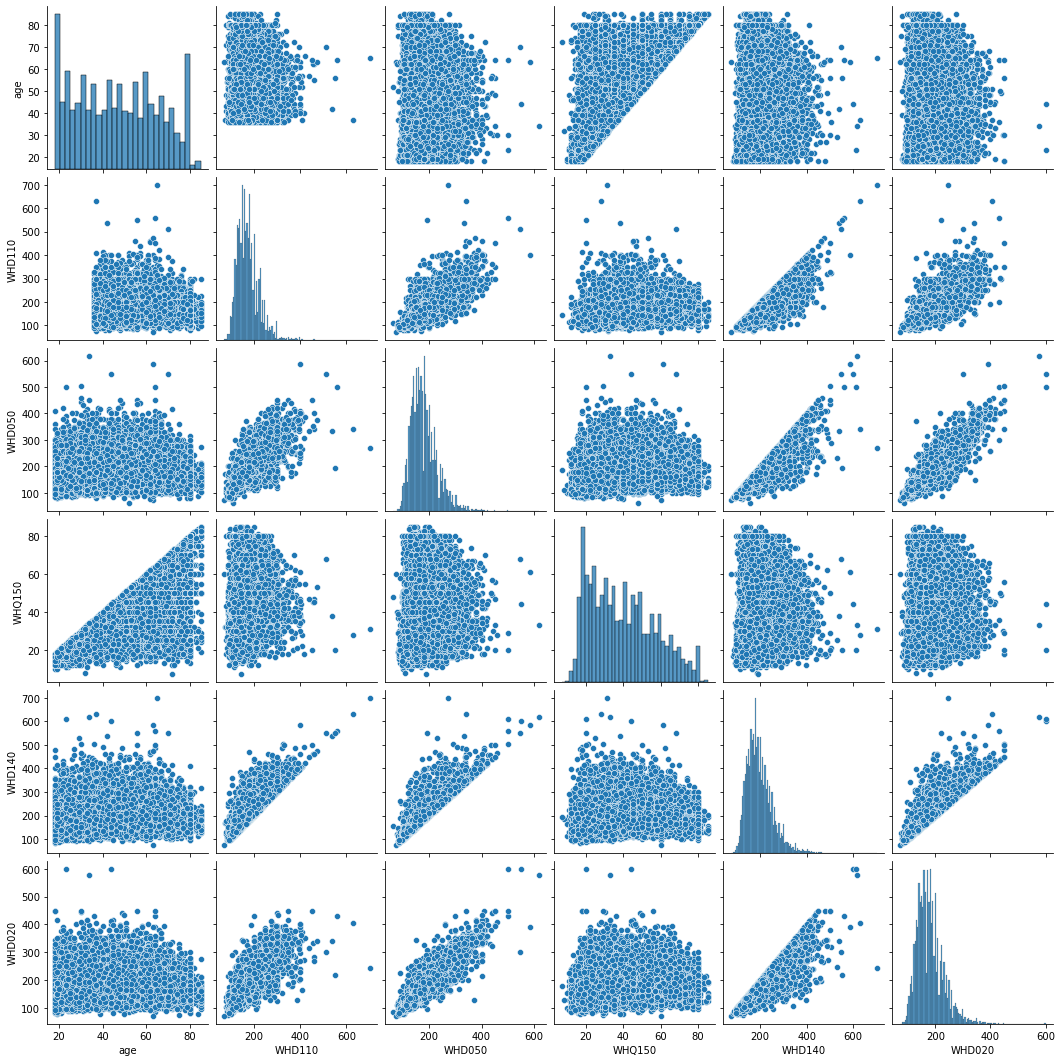

In [114]:
sns.pairplot(train_set[["age","WHD110","WHD050","WHQ150","WHD140","WHD020"]])
#plt.savefig('../Output/pairs.png')
plt.show()
